In [1]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_port = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
novas_stopwords = ['RT', 'sobre', 'Saiba', 'MPSP', 'contra']
for palavra in novas_stopwords:
  stopwords_port.add(palavra)
stopwords_port

In [3]:
import pandas as pd
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
%matplotlib inline

# Carrega as credenciais da API do Twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
username = 'mpsp_oficial'
max_tweets = 3000
 
#Query
tweets = tweepy.Cursor(api.user_timeline, id=username, tweet_mode='extended').items(max_tweets)

In [5]:
# Lista de tweets
tweets_list = []
for tweet in tweets:
  tweets_list.append([tweet.id_str, tweet.full_text, tweet.created_at, tweet.user.screen_name, tweet.retweet_count, tweet.favorite_count, tweet.lang, 
                      tweet.source, tweet.in_reply_to_screen_name, tweet.in_reply_to_status_id_str, tweet.in_reply_to_user_id_str, tweet.is_quote_status])

# Colunas do dataframe
colunas = ['Id. único', 'Texto', 'Criado em', 'Usuário', 'Qtd. retuítes', 'Likes', 'Língua', 'Fonte', 'Em resposta ao user:', 'Em resp. ao status de id:', 
           'Em resp. ao user de id:', 'Tuíte citado?']

# Criação do dataframe 
tweets_df = pd.DataFrame(tweets_list, columns=colunas)

In [6]:
# Verificação: é um retuíte?
def verifica_retuite(texto):
  if texto.startswith('RT @'):
    return True
  else:
    return False

tweets_df ['É retuíte?'] = tweets_df['Texto'].apply(lambda x: verifica_retuite(x))
tweets_df

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
0,1415667309222326281,"#Gaeco Após 2 dias de julgamento, o Tribunal d...",2021-07-15 13:39:23,mpsp_oficial,0,0,pt,Twitter Web App,None,None,None,False,False
1,1415647598594174982,#GaecoEmNúmeros Crimes contra a administração ...,2021-07-15 12:21:03,mpsp_oficial,0,1,pt,Twitter Web App,None,None,None,False,False
2,1415412067151007750,"Acontece agora o webinar ""O capacitismo e as b...",2021-07-14 20:45:08,mpsp_oficial,1,2,pt,Twitter Web App,None,None,None,True,False
3,1415399131116343298,"#ViolênciaPolicial Segundo os relatos, após pe...",2021-07-14 19:53:44,mpsp_oficial,1,0,pt,Twitter Web App,None,None,None,False,False
4,1415382413765660676,"Apesar de não ser nova, a não-binariedade aind...",2021-07-14 18:47:18,mpsp_oficial,49,142,pt,Twitter Web App,None,None,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1062010775739469826,O #EstúdioMPSP desta semana traz entrevista co...,2018-11-12 15:54:34,mpsp_oficial,1,5,pt,Twitter for iPhone,None,None,None,False,False
2996,1061975497368879104,⚠Termina hoje o prazo das inscrições para o 23...,2018-11-12 13:34:23,mpsp_oficial,3,2,pt,Twitter Web Client,None,None,None,False,False
2997,1061974018138533889,#MPSP se reúne com representantes do Centro Pa...,2018-11-12 13:28:31,mpsp_oficial,1,2,pt,Twitter Web Client,None,None,None,False,False
2998,1061951197266018304,#MPSP se reúne com Comissão Interamericana de ...,2018-11-12 11:57:50,mpsp_oficial,2,3,pt,Twitter Web Client,None,None,None,False,False


In [7]:
# Opção: restrição do dataframe à gestão Sarrubbo
criterio = tweets_df['Criado em'] >= '2020-04-06'
tweets_df = tweets_df[criterio]

tweets_df.to_excel(username+'_Sarrubbo.xlsx')
tweets_df

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
0,1415667309222326281,"#Gaeco Após 2 dias de julgamento, o Tribunal d...",2021-07-15 13:39:23,mpsp_oficial,0,0,pt,Twitter Web App,None,None,None,False,False
1,1415647598594174982,#GaecoEmNúmeros Crimes contra a administração ...,2021-07-15 12:21:03,mpsp_oficial,0,1,pt,Twitter Web App,None,None,None,False,False
2,1415412067151007750,"Acontece agora o webinar ""O capacitismo e as b...",2021-07-14 20:45:08,mpsp_oficial,1,2,pt,Twitter Web App,None,None,None,True,False
3,1415399131116343298,"#ViolênciaPolicial Segundo os relatos, após pe...",2021-07-14 19:53:44,mpsp_oficial,1,0,pt,Twitter Web App,None,None,None,False,False
4,1415382413765660676,"Apesar de não ser nova, a não-binariedade aind...",2021-07-14 18:47:18,mpsp_oficial,49,142,pt,Twitter Web App,None,None,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,1247206818713153536,Total revertido em favor da #Saúde por promoto...,2020-04-06 16:57:32,mpsp_oficial,2,5,pt,Twitter Web App,None,None,None,False,False
1626,1247178955951652866,Promotor recomenda que #Barretos adote medidas...,2020-04-06 15:06:49,mpsp_oficial,1,2,pt,Twitter Web App,None,None,None,False,False
1627,1247178897847877634,Promotoria obtém R$ 40 mil para compra de resp...,2020-04-06 15:06:35,mpsp_oficial,0,2,pt,Twitter Web App,None,None,None,False,False
1628,1247178845624680448,"Após recomendações de Promotoria, #FrancoDaRoc...",2020-04-06 15:06:22,mpsp_oficial,0,0,pt,Twitter Web App,None,None,None,False,False


In [8]:
# Utilização de 'Expressões Regulares' para remover URL do tweet
def deleta_url (url):
  return re.sub(r'http\S+', '', url)

tweets_df['Texto'] = tweets_df['Texto'].apply(lambda x: deleta_url(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
# Junta (faz o 'join') dos tuítes (coluna 'Texto' do dataframe) numa única string
dados = ' '.join(tweets_df['Texto'])

In [10]:
# Grava arquivo texto
arquivo = open(username+'_Sarrubbo.txt', 'w', encoding='utf-8')
arquivo.writelines(dados)
arquivo.close()

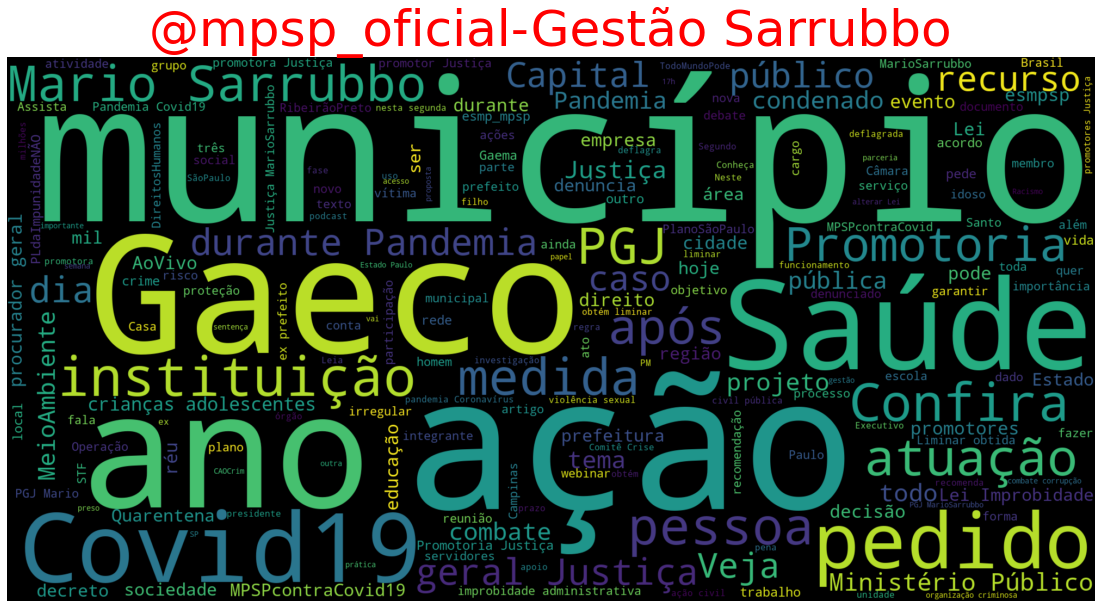

In [11]:
# Geração do Wordcloud
plt.figure(figsize=(20,10))
wc = WordCloud(mode="RGBA",
               stopwords = stopwords_port,
               width=2000, 
               height=1000,
               normalize_plurals=True).generate(dados)

plt.title('@'+username+ '-Gestão Sarrubbo', fontsize=50, color="red")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(username+"_Sarrubbo.png")
plt.show()

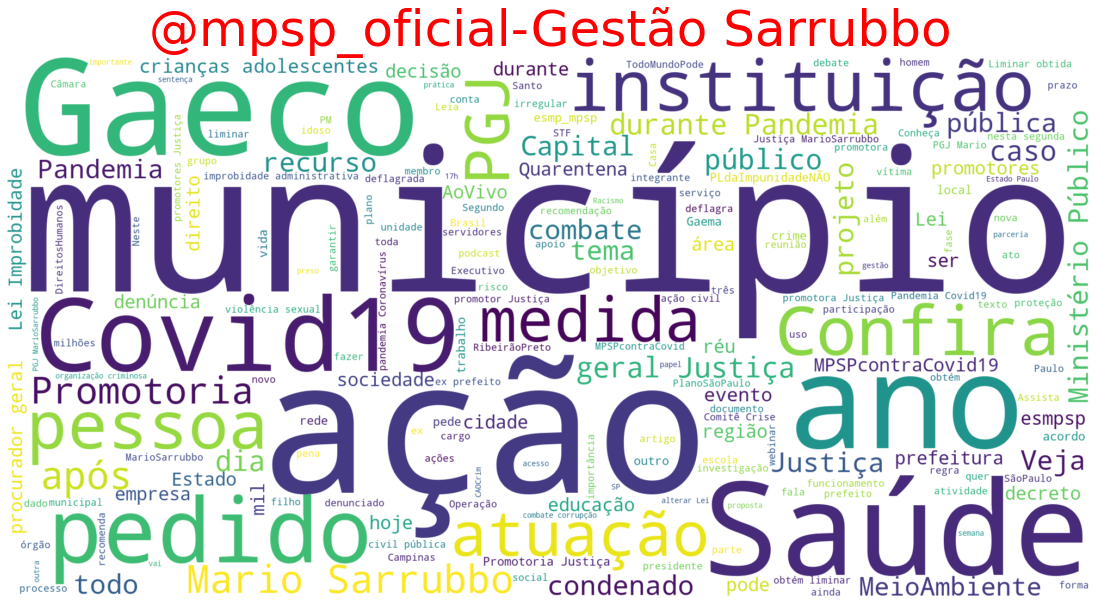

In [12]:
# Geração do Wordcloud
plt.figure(figsize=(20,10))
wc = WordCloud(background_color='white', 
               mode="RGB",
               stopwords=stopwords_port,
               width=2000, 
               height=1000,
               normalize_plurals=True).generate(dados)

plt.title('@'+username+'-Gestão Sarrubbo', fontsize=50, color="red")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(username+"_Sarrubbo1.png")
plt.show()

# **Análises**

In [13]:
# Mais retuitados (excluídos os retuítes feitos pelo próprio usuário)
criterio = tweets_df ['É retuíte?'] == False
tweets_df[criterio].sort_values(by='Qtd. retuítes', ascending=False).head(20)

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
185,1405148427827257351,#PLdaImpunidadeNÃO O texto do PL que afrouxa a...,2021-06-16 13:01:06,mpsp_oficial,171,230,pt,Twitter Web App,None,None,None,False,False
607,1374884017896579075,#MPSPcontraCovid Prefeito de Mirandópolis é mu...,2021-03-25 00:41:08,mpsp_oficial,102,284,pt,Twitter Web App,None,None,None,False,False
4,1415382413765660676,"Apesar de não ser nova, a não-binariedade aind...",2021-07-14 18:47:18,mpsp_oficial,49,142,pt,Twitter Web App,None,None,None,False,False
186,1405117956535635972,Hoje (16) está prevista votação do PL 10.887/2...,2021-06-16 11:00:01,mpsp_oficial,44,63,pt,Twitter Web App,None,None,None,False,False
195,1404856492449271816,"O #MPSP convida para #tuitaço, amanhã (16/06),...",2021-06-15 17:41:03,mpsp_oficial,42,61,pt,Twitter Web App,None,None,None,False,False
184,1405153938102538241,#PLdaImpunidadeNÃO O PL 10.887/2018 admite a p...,2021-06-16 13:22:59,mpsp_oficial,42,105,pt,Twitter Web App,None,None,None,False,False
176,1405164643912491015,⚠️#PLdaImpunidadeNÃO O PL 10.887/2018 prevê a ...,2021-06-16 14:05:32,mpsp_oficial,36,60,pt,Twitter Web App,None,None,None,False,False
600,1375431685240729613,"O #MPSPExplica como denunciar o ""fura-fila"" da...",2021-03-26 12:57:22,mpsp_oficial,35,81,pt,Twitter Web App,None,None,None,False,False
255,1399719300261453826,"Deflagrada nesta terça, #OperaçãoTokusatsu tem...",2021-06-01 13:27:41,mpsp_oficial,34,103,pt,Twitter Web App,None,None,None,False,False
174,1405173418467725313,#PLdaImpunidadeNÃO O texto prevê prescrição de...,2021-06-16 14:40:24,mpsp_oficial,25,47,pt,Twitter Web App,None,None,None,False,False


In [14]:
# Com mais 'likes', excluídos os retuitados
criterio = tweets_df ['É retuíte?'] == False
tweets_df[criterio].sort_values(by='Likes', ascending=False).head(20)

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
607,1374884017896579075,#MPSPcontraCovid Prefeito de Mirandópolis é mu...,2021-03-25 00:41:08,mpsp_oficial,102,284,pt,Twitter Web App,None,None,None,False,False
185,1405148427827257351,#PLdaImpunidadeNÃO O texto do PL que afrouxa a...,2021-06-16 13:01:06,mpsp_oficial,171,230,pt,Twitter Web App,None,None,None,False,False
4,1415382413765660676,"Apesar de não ser nova, a não-binariedade aind...",2021-07-14 18:47:18,mpsp_oficial,49,142,pt,Twitter Web App,None,None,None,False,False
184,1405153938102538241,#PLdaImpunidadeNÃO O PL 10.887/2018 admite a p...,2021-06-16 13:22:59,mpsp_oficial,42,105,pt,Twitter Web App,None,None,None,False,False
255,1399719300261453826,"Deflagrada nesta terça, #OperaçãoTokusatsu tem...",2021-06-01 13:27:41,mpsp_oficial,34,103,pt,Twitter Web App,None,None,None,False,False
600,1375431685240729613,"O #MPSPExplica como denunciar o ""fura-fila"" da...",2021-03-26 12:57:22,mpsp_oficial,35,81,pt,Twitter Web App,None,None,None,False,False
186,1405117956535635972,Hoje (16) está prevista votação do PL 10.887/2...,2021-06-16 11:00:01,mpsp_oficial,44,63,pt,Twitter Web App,None,None,None,False,False
195,1404856492449271816,"O #MPSP convida para #tuitaço, amanhã (16/06),...",2021-06-15 17:41:03,mpsp_oficial,42,61,pt,Twitter Web App,None,None,None,False,False
176,1405164643912491015,⚠️#PLdaImpunidadeNÃO O PL 10.887/2018 prevê a ...,2021-06-16 14:05:32,mpsp_oficial,36,60,pt,Twitter Web App,None,None,None,False,False
1473,1258818698929778689,#MPSP dá 48 horas para prefeitura apresentar e...,2020-05-08 17:59:00,mpsp_oficial,15,55,pt,TweetDeck,None,None,None,False,False


In [15]:
# Interação com o público
criterio1 = (pd.notna(tweets_df['Em resposta ao user:'])) & (tweets_df['Em resposta ao user:'] != username)
tweets_df[criterio1]

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
36,1412406633288900614,@PlanBR Juntos no enfrentamento às violências ...,2021-07-06 13:42:37,mpsp_oficial,0,0,pt,Twitter Web App,PlanBR,1412370933281705985,116851757,False,False
102,1409891660658532356,"@malunguinho É só chegar aqui, pessoal: \nAgr...",2021-06-29 15:09:01,mpsp_oficial,1,2,pt,Twitter Web App,malunguinho,1409890866852941824,1010042450788962304,False,False
106,1409600952261296129,"@bibliofernando Olá, Nando! Foi um erro. Obrig...",2021-06-28 19:53:50,mpsp_oficial,0,0,pt,Twitter Web App,bibliofernando,1409595470561918978,15516718,False,False
158,1405938307155087360,@ferpannunzio Milho faz um arraiá todinho! 🌽💛,2021-06-18 17:19:48,mpsp_oficial,0,1,pt,Twitter Web App,ferpannunzio,1405903533031968769,1291928190,False,False
159,1405913488279621636,"@esmpsp Não dá pra dançar aglomerado, mas tamb...",2021-06-18 15:41:10,mpsp_oficial,0,0,pt,Twitter Web App,esmpsp,1405909277705965571,1139854446,False,False
180,1405156614076776451,@renatacorrea O MPSP está explicando detalhes ...,2021-06-16 13:33:38,mpsp_oficial,3,11,pt,Twitter Web App,renatacorrea,1405122243861139456,138528069,False,False
182,1405154839915548677,@MPETocantins ⚠️#PLdaImpunidadeNÃO ⚠️,2021-06-16 13:26:35,mpsp_oficial,0,2,und,Twitter Web App,MPETocantins,1405154217615138821,156619759,False,False
183,1405154572805578752,@mpscnoticias #PLdaImpunidadeNÃO 🙌,2021-06-16 13:25:31,mpsp_oficial,0,2,und,Twitter Web App,mpscnoticias,1405153316389150722,65378456,False,False
187,1404945235612999684,"@maabariani @pref_sorocaba Olá, boa noite. Seg...",2021-06-15 23:33:41,mpsp_oficial,0,1,pt,Twitter Web App,maabariani,1404945044516245504,1260558106288939010,False,False
190,1404887196864331777,"@mpscnoticias Obrigado, @mpscnoticias! 🙌Vamos ...",2021-06-15 19:43:03,mpsp_oficial,0,1,pt,Twitter Web App,mpscnoticias,1404882696627761153,65378456,False,False


In [16]:
tweets_mensais = tweets_df[['Criado em', 'Texto', 'Qtd. retuítes', 'Likes']]
tweets_mensais['mês_ano'] = pd.to_datetime(tweets_mensais['Criado em']).dt.to_period('M')
tweets_mensais = tweets_mensais.set_index('mês_ano')
tweets_mensais

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Criado em,Texto,Qtd. retuítes,Likes
mês_ano,,,,
2021-07,2021-07-15 13:39:23,"#Gaeco Após 2 dias de julgamento, o Tribunal d...",0,0
2021-07,2021-07-15 12:21:03,#GaecoEmNúmeros Crimes contra a administração ...,0,1
2021-07,2021-07-14 20:45:08,"Acontece agora o webinar ""O capacitismo e as b...",1,2
2021-07,2021-07-14 19:53:44,"#ViolênciaPolicial Segundo os relatos, após pe...",1,0
2021-07,2021-07-14 18:47:18,"Apesar de não ser nova, a não-binariedade aind...",49,142
...,...,...,...,...
2020-04,2020-04-06 16:57:32,Total revertido em favor da #Saúde por promoto...,2,5
2020-04,2020-04-06 15:06:49,Promotor recomenda que #Barretos adote medidas...,1,2
2020-04,2020-04-06 15:06:35,Promotoria obtém R$ 40 mil para compra de resp...,0,2


In [17]:
n_tweets = tweets_mensais.groupby('mês_ano')['Texto'].count()
n_tweets

mês_ano
2020-04    119
2020-05     99
2020-06    110
2020-07     81
2020-08     74
2020-09     78
2020-10     86
2020-11     61
2020-12     76
2021-01     30
2021-02     66
2021-03    192
2021-04    127
2021-05    175
2021-06    177
2021-07     79
Freq: M, Name: Texto, dtype: int64

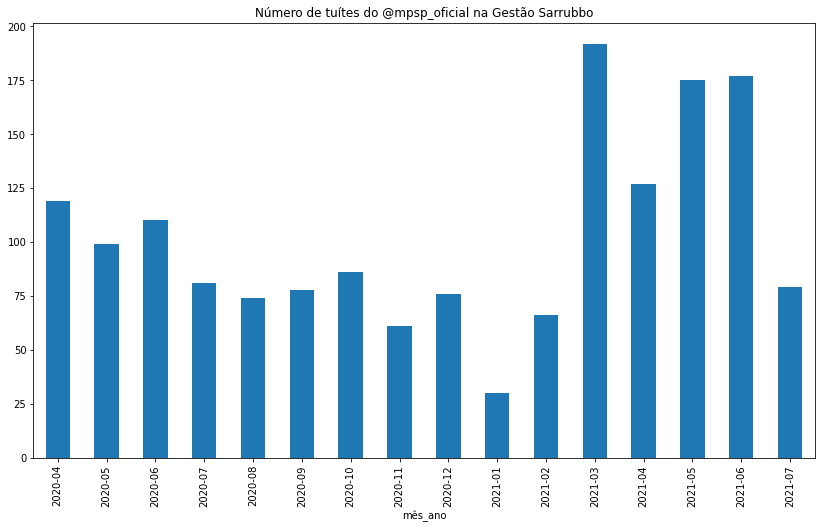

In [18]:
n_tweets.plot.bar(figsize=(14,8),title = 'Número de tuítes do @'+ username+' na Gestão Sarrubbo')
plt.savefig(username+"_Sarrubbo2.png")

In [19]:
n_retweets = tweets_mensais.groupby('mês_ano')['Qtd. retuítes'].sum()
n_retweets

mês_ano
2020-04    136
2020-05    145
2020-06    103
2020-07     86
2020-08     74
2020-09     68
2020-10     76
2020-11     49
2020-12     52
2021-01     27
2021-02     96
2021-03    345
2021-04     92
2021-05     93
2021-06    728
2021-07     93
Freq: M, Name: Qtd. retuítes, dtype: int64

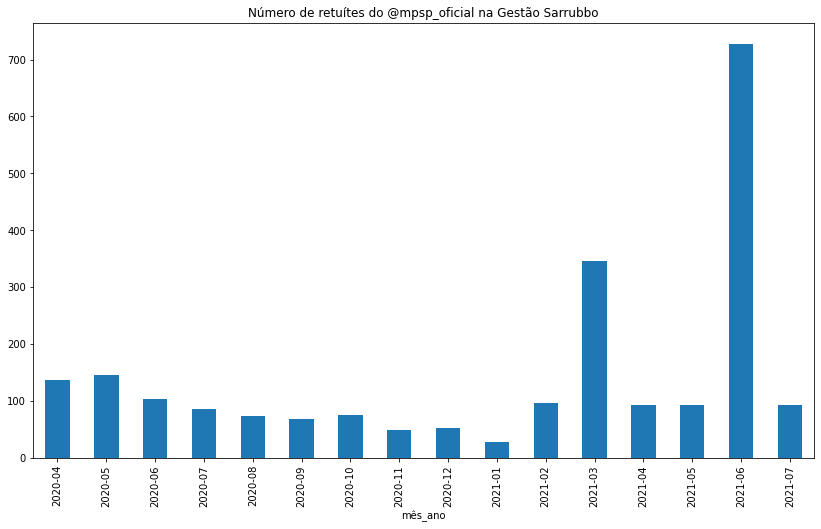

In [20]:
n_retweets.plot.bar(figsize=(14,8),title = 'Número de retuítes do @'+ username+' na Gestão Sarrubbo')
plt.savefig(username+"_Sarrubbo3.png")

In [21]:
n_likes = tweets_mensais.groupby('mês_ano')['Likes'].sum()
n_likes

mês_ano
2020-04     455
2020-05     496
2020-06     388
2020-07     210
2020-08     194
2020-09     312
2020-10     305
2020-11     179
2020-12     296
2021-01     134
2021-02     281
2021-03    1002
2021-04     412
2021-05     478
2021-06    1482
2021-07     272
Freq: M, Name: Likes, dtype: int64

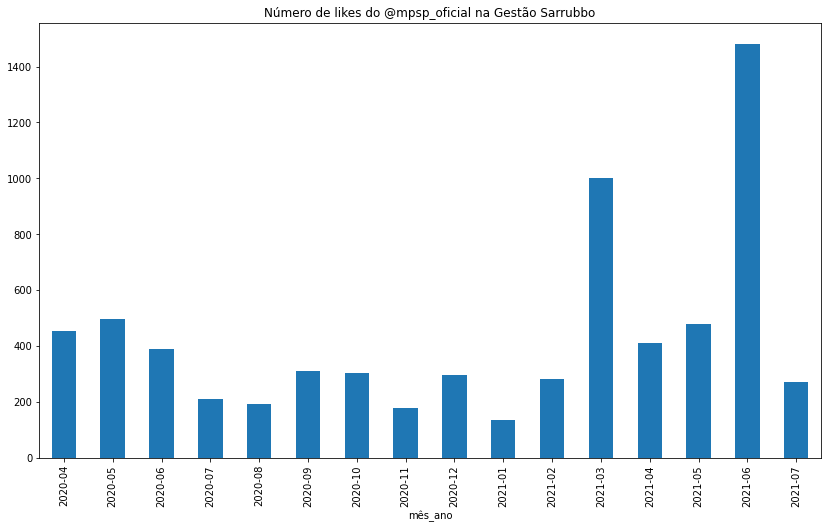

In [22]:
n_likes.plot.bar(figsize=(14,8),title = 'Número de likes do @'+username+ ' na Gestão Sarrubbo')
plt.savefig(username+"_Sarrubbo4.png")

In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 1629
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id. único                  1630 non-null   object        
 1   Texto                      1630 non-null   object        
 2   Criado em                  1630 non-null   datetime64[ns]
 3   Usuário                    1630 non-null   object        
 4   Qtd. retuítes              1630 non-null   int64         
 5   Likes                      1630 non-null   int64         
 6   Língua                     1630 non-null   object        
 7   Fonte                      1630 non-null   object        
 8   Em resposta ao user:       238 non-null    object        
 9   Em resp. ao status de id:  238 non-null    object        
 10  Em resp. ao user de id:    238 non-null    object        
 11  Tuíte citado?              1630 non-null   bool          
 12  É retu